<font color='red' size=5> **Изработил: Димитрија Тимески - 203235** </font>


<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/data

<font color = 'Orange' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </font>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Blue' size = 4 > Structure of the Dataset </font>

<font color = 'Orange' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Blue' size = 4 >FIRST PART</font>

<font color = 'Orange' size = 3 > Choose a model that you will use from the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='orange'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>
</ul>
<font color = 'Blue' size = 4 >SECOND PART</font>
<ul>
<font color='Orange'>
Cluster the tweets based on their embeddings using one of the clustering algorithms:

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>

</ul>

</font>

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#FIRST PART - Text Classification

##Model 1 - bert-base-uncased



###Loading the Data

In [138]:
import numpy as np
import pandas as pd

In [139]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/test.csv")
sample = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/sample_submission.csv")

In [140]:
train.columns = ["id","keyword","location","text","label"]
train.head(3)

,id,keyword,location,text,label
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [141]:
test.head(3)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."


In [142]:
sample.head(3)

,id,target
0,0,0
1,2,0
2,3,0


In [143]:
test = test.join(sample, lsuffix='id', rsuffix='id')
test

,idid,keyword,location,text,idid,target
0,0,NaN,NaN,Just happened a terrible car crash,0,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",2,0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",3,0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,9,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,11,0
...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,10861,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,10865,0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,10868,0
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,10874,0


In [144]:
test.columns = ["id","keyword","location","text","wrong","label"]
test.drop(["wrong"], axis=1, inplace=True)
test

,id,keyword,location,text,label
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,0
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,0


###Preprocessing

In [145]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
label          0
dtype: int64

In [146]:
test.isna().sum()

id             0
keyword       26
location    1105
text           0
label          0
dtype: int64

In [147]:
train.drop(['location'],axis=1,inplace=True)
test.drop(['location'],axis=1,inplace=True)

In [148]:
train.dropna(axis=0,inplace=True)
# Kaggle requirement: Your submission should be a CSV file with 3263 rows and a header. You can upload a zip/gz/7z archive.
# Because of this reason, I will not drop any rows from the test dataset and go with it as is.
# test.dropna(axis=0,inplace=True)   

In [149]:
print(train.isna().sum())
print(test.isna().sum())

id         0
keyword    0
text       0
label      0
dtype: int64
id          0
keyword    26
text        0
label       0
dtype: int64


In [150]:
#This step while valid during the colab training, is not good when uploading it on kaggle.  (The test text there isn't joined with the keyword)

# train.text = train.keyword + ' ' +train.text
# test.text = test.keyword + ' ' + test.text

In [151]:
test.drop(["keyword"], axis=1, inplace=True)
train.drop(["keyword"], axis=1, inplace=True)
train

,id,text,label
31,48,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,We always try to bring the heavy. #metal #RT h...,0
33,50,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,Crying out for more! Set me ablaze,0
35,53,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...
7578,10830,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,Three days off from work and they've pretty mu...,0
7580,10832,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,@engineshed Great atmosphere at the British Li...,0


In [152]:
from sklearn.model_selection import train_test_split

train,val = train_test_split(train, test_size=0.2)

In [153]:
val

,id,text,label
1184,1705,Two giant cranes holding a bridge collapse int...,1
424,614,#Arsonist arrested for setting many fires. WAT...,1
773,1119,Lmao that light skin guy blew up on Twitter by...,0
2910,4178,When a real nigga hold you down you supposed t...,0
54,78,Noches El-Bestia '@Alexis_Sanchez: happy to se...,0
...,...,...,...
777,1124,Zayn just blew up twitter.,0
3368,4825,. @VELDFest announces refunds after Day two's ...,1
2142,3074,@Eazzy_P we will never know what would have ha...,1
5577,7958,Landslide caused by severe rainstorm kills 3 i...,1


###Installing Necessities

In [65]:
! pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 9.0 MB/s eta 0:00:00


In [14]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Transforming train and test DataFrame into a HuggingFace DataSet

In [155]:
import pandas as pd
import datasets
from datasets import Dataset, DatasetDict, load_dataset


train_df = train
val_df = val
test_df = test

train_dataset = Dataset.from_dict(train_df)
val_dataset = Dataset.from_dict(val_df)
test_dataset = Dataset.from_dict(test_df)

my_dataset_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset,"val":val_dataset})

In [156]:
my_dataset_dict.column_names

{'train': ['id', 'text', 'label'],
 'test': ['id', 'text', 'label'],
 'val': ['id', 'text', 'label']}

###Making the Model

In [157]:
from transformers import AutoTokenizer, DataCollatorWithPadding
def tokenize_function(example):
    return tokenizer(example['text'], truncation=True)

In [158]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenized_datasets = my_dataset_dict.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file to

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [159]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [160]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/pytorch_m

In [161]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["val"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [162]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6041
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2268
  Number of trainable parameters = 109483778
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a

Step,Training Loss
500,0.517300
1000,0.445800
1500,0.374900
2000,0.277000


Saving model checkpoint to test-trainer/checkpoint-500
Configuration saved in test-trainer/checkpoint-500/config.json
Model weights saved in test-trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-500/special_tokens_map.json
Saving model checkpoint to test-trainer/checkpoint-1000
Configuration saved in test-trainer/checkpoint-1000/config.json
Model weights saved in test-trainer/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-1000/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to test-trainer/checkpoint-1500
Configuration saved in test-trainer/checkpoint-1500/config.json
Model weights saved in test-trainer/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-1500/tokenizer_config.json
Special tokens file saved

TrainOutput(global_step=2268, training_loss=0.3889106636114642, metrics={'train_runtime': 275.0869, 'train_samples_per_second': 65.881, 'train_steps_per_second': 8.245, 'total_flos': 467699428676040.0, 'train_loss': 0.3889106636114642, 'epoch': 3.0})

###Predicting

In [172]:
predictions = trainer.predict(tokenized_datasets["test"])
print(predictions.predictions.shape, predictions.label_ids.shape)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 8


(3263, 2) (3263,)


In [173]:
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [174]:
# from sklearn.metrics import f1_score

# print(f1_score(preds, predictions.label_ids))

0.0


In [175]:
from sklearn.metrics import f1_score
import evaluate

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

{'accuracy': 0.6043518234753295, 'f1': 0.0}

In [182]:
submissions = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/sample_submission.csv")

In [183]:
preds

array([1, 1, 1, ..., 1, 1, 1])

In [184]:
submissions

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [185]:
submissions["target"] = preds

In [186]:
submissions

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [189]:
submissions.to_csv("sample_submission_1.csv",index=False)  #We upload this file on kaggle as a submition.

##Model 2 - xlm-roberta-base


###Loading The Data

In [220]:
import numpy as np
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/test.csv")
sample = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/sample_submission.csv")

train.columns = ["id","keyword","location","text","label"]

test = test.join(sample, lsuffix='id', rsuffix='id')
test.columns = ["id","keyword","location","text","wrong","label"]

test.drop(['wrong','location','keyword'], axis=1, inplace=True)
train.drop(['location','keyword'],axis=1,inplace=True)


from sklearn.model_selection import train_test_split
train,val = train_test_split(train, test_size=0.2)

###Transform to DataSet

In [221]:
import pandas as pd
import datasets
from datasets import Dataset, DatasetDict, load_dataset

train_df = train
val_df = val
test_df = test

train_dataset = Dataset.from_dict(train_df)
val_dataset = Dataset.from_dict(val_df)
test_dataset = Dataset.from_dict(test_df)

my_dataset_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset,"val":val_dataset})

###Train the Model

In [225]:
from transformers import AutoTokenizer, DataCollatorWithPadding
def tokenize_function(example):
    return tokenizer(example['text'], truncation=True)

tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
tokenized_datasets = my_dataset_dict.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

from transformers import TrainingArguments
training_args = TrainingArguments("test-trainer")

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=2)

from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["val"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

trainer.train()

Could not locate the tokenizer configuration file, will try to use the model config instead.


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}



Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/sentencepiece.bpe.model
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_r

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past":

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/pytorch_model.bin
Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassificat

Step,Training Loss
500,0.656700
1000,0.573100
1500,0.550300
2000,0.503800


Saving model checkpoint to test-trainer/checkpoint-500
Configuration saved in test-trainer/checkpoint-500/config.json
Model weights saved in test-trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-500/special_tokens_map.json
Saving model checkpoint to test-trainer/checkpoint-1000
Configuration saved in test-trainer/checkpoint-1000/config.json
Model weights saved in test-trainer/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-1000/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to test-trainer/checkpoint-1500
Configuration saved in test-trainer/checkpoint-1500/config.json
Model weights saved in test-trainer/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-1500/tokenizer_config.json
Special tokens file saved

TrainOutput(global_step=2286, training_loss=0.5583325483667569, metrics={'train_runtime': 476.5084, 'train_samples_per_second': 38.341, 'train_steps_per_second': 4.797, 'total_flos': 490717534909800.0, 'train_loss': 0.5583325483667569, 'epoch': 3.0})

###Predict

In [226]:
predictions = trainer.predict(tokenized_datasets["test"])
print(predictions.predictions.shape, predictions.label_ids.shape)

import numpy as np
preds = np.argmax(predictions.predictions, axis=-1)

from sklearn.metrics import f1_score
import evaluate
metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

The following columns in the test set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 8


(3263, 2) (3263,)


{'accuracy': 0.5896414342629482, 'f1': 0.0}

###Predict2CSV For Kaggle

In [227]:
submissions = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/sample_submission.csv")
submissions["target"] = preds
submissions.to_csv("sample_submission_2.csv",index=False)  #We upload this file on kaggle as a submition.

##Model 3

In [228]:
import numpy as np
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/test.csv")
sample = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/sample_submission.csv")

train.columns = ["id","keyword","location","text","label"]

test = test.join(sample, lsuffix='id', rsuffix='id')
test.columns = ["id","keyword","location","text","wrong","label"]

test.drop(['wrong','location','keyword'], axis=1, inplace=True)
train.drop(['location','keyword'],axis=1,inplace=True)


from sklearn.model_selection import train_test_split
train,val = train_test_split(train, test_size=0.2)

import pandas as pd
import datasets
from datasets import Dataset, DatasetDict, load_dataset

train_df = train
val_df = val
test_df = test

train_dataset = Dataset.from_dict(train_df)
val_dataset = Dataset.from_dict(val_df)
test_dataset = Dataset.from_dict(test_df)

my_dataset_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset,"val":val_dataset})

from transformers import AutoTokenizer, DataCollatorWithPadding
def tokenize_function(example):
    return tokenizer(example['text'], truncation=True)

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
tokenized_datasets = my_dataset_dict.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

from transformers import TrainingArguments
training_args = TrainingArguments("test-trainer")

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english", num_labels=2)

from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["val"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

trainer.train()

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/bfdd146ea2b6807255b73527f1327ca12b6ed5c4/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.25.1",
  "vocab_size": 30522
}



Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/bfdd146ea2b6807255b73527f1327ca12b6ed5c4/vocab.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/bfdd146ea2b6807255b73527f1327ca12b6ed5c4/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/bfdd146ea2b6807255b73527f1327ca12b6ed5c4/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/bfdd146ea2b6807255b73527f1327ca12b6ed5c4/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type"

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/bfdd146ea2b6807255b73527f1327ca12b6ed5c4/pytorch_model.bin
All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForSequenceClassification for predictions without further training.
The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This i

Step,Training Loss
500,0.489800
1000,0.386600
1500,0.312600
2000,0.191100


Saving model checkpoint to test-trainer/checkpoint-500
Configuration saved in test-trainer/checkpoint-500/config.json
Model weights saved in test-trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-500/special_tokens_map.json
Saving model checkpoint to test-trainer/checkpoint-1000
Configuration saved in test-trainer/checkpoint-1000/config.json
Model weights saved in test-trainer/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-1000/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to test-trainer/checkpoint-1500
Configuration saved in test-trainer/checkpoint-1500/config.json
Model weights saved in test-trainer/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-1500/tokenizer_config.json
Special tokens file saved

TrainOutput(global_step=2286, training_loss=0.3287011627971552, metrics={'train_runtime': 152.1886, 'train_samples_per_second': 120.048, 'train_steps_per_second': 15.021, 'total_flos': 237667211219904.0, 'train_loss': 0.3287011627971552, 'epoch': 3.0})

In [229]:
predictions = trainer.predict(tokenized_datasets["test"])
print(predictions.predictions.shape, predictions.label_ids.shape)

import numpy as np
preds = np.argmax(predictions.predictions, axis=-1)

from sklearn.metrics import f1_score
import evaluate
metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

#Kaggle
submissions = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/sample_submission.csv")
submissions["target"] = preds
submissions.to_csv("sample_submission_3.csv",index=False)  #We upload this file on kaggle as a submition.

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 8


(3263, 2) (3263,)


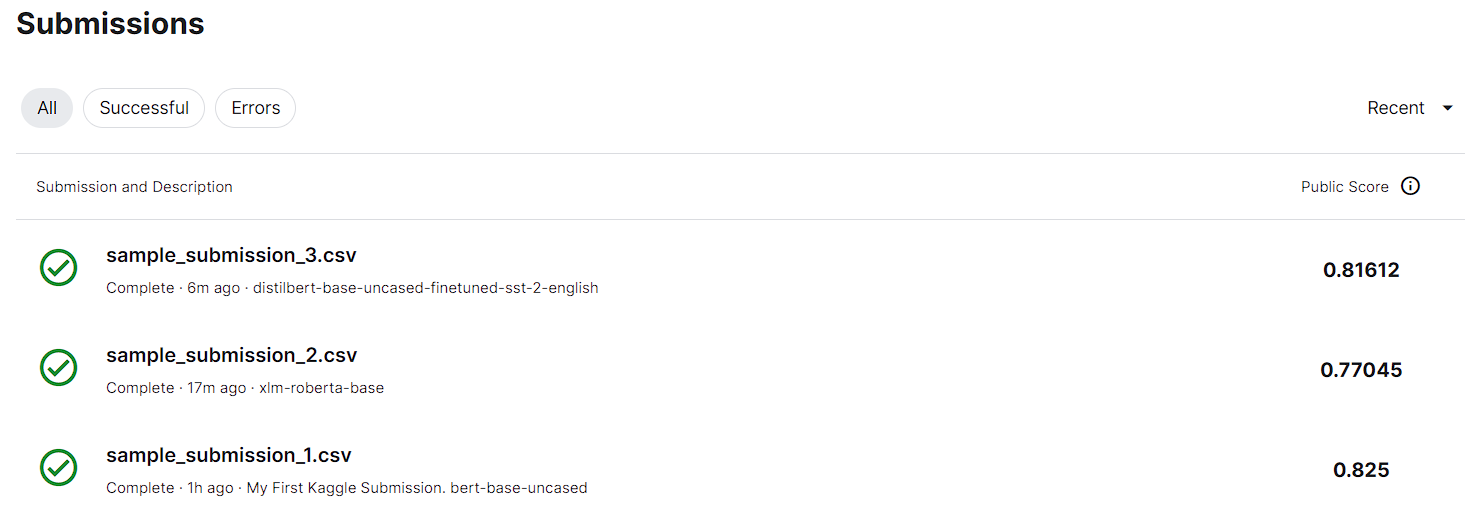

#Part 2 - Clustering the tweets

In [195]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2 Kol/Lab 5/train.csv")

In [196]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [197]:
df['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [198]:
tweets = embed(df['text'].values)

In [199]:
tweets

<tf.Tensor: shape=(7613, 512), dtype=float32, numpy=
array([[-0.05938241, -0.0188951 , -0.04077131, ..., -0.0376553 ,
        -0.06941316, -0.08671616],
       [ 0.03659689,  0.05027485,  0.02020238, ..., -0.00457899,
        -0.02120872,  0.00290395],
       [ 0.00149923,  0.03512443,  0.03224241, ..., -0.05414993,
         0.07224018,  0.05789762],
       ...,
       [-0.00839218, -0.00212518, -0.06177938, ..., -0.05840642,
        -0.01960978, -0.08983654],
       [-0.05943761,  0.07270394, -0.01466317, ..., -0.01396656,
        -0.06471784, -0.07085624],
       [ 0.00697959, -0.0717947 , -0.01469826, ...,  0.00945406,
         0.02885959,  0.04562905]], dtype=float32)>

In [202]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,30):
  kmeans=KMeans(n_clusters=int(i))
  kmeans.fit(tweets)
  inertia.append(kmeans.inertia_)

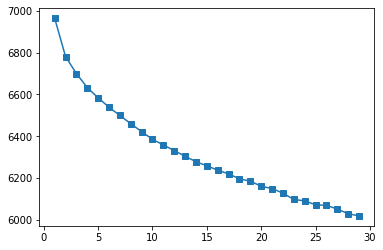

In [207]:
plt.plot(range(1,30),inertia,marker='s')

In [240]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(tweets,n_neighbors=25)
model = AgglomerativeClustering(n_clusters=2,connectivity=connectivity)
model.fit(tweets)
clusters= model.labels_

In [241]:
from sklearn.decomposition import PCA
pca = PCA(2)
tweets_2d = pca.fit_transform(tweets)
tweets_2d

array([[-0.11681386, -0.0324611 ],
       [-0.17444109,  0.28806192],
       [-0.16988749,  0.11591408],
       ...,
       [-0.09908438,  0.25405277],
       [-0.29399608, -0.08275214],
       [-0.30625447,  0.28215934]])

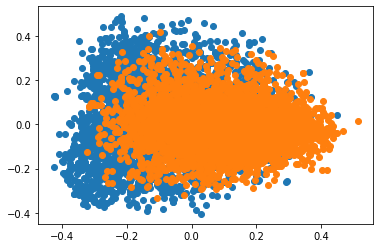

In [243]:
for i in range(0,3):
  plt.scatter(tweets_2d[clusters==i,0],tweets_2d[clusters==i,1],label=i)

In [244]:
from sklearn import datasets
x = datasets.load_digits().data
y = datasets.load_digits().target
model = AgglomerativeClustering(n_clusters=10)
model.fit(x)
clusters = model.labels_

In [245]:
from sklearn.metrics import v_measure_score
v_measure_score(y,clusters)

0.8681701126909083